# Baseline Model

A baseline model is a model that is both <b/>simple to implement</b> and has a <b/>reasonable chance of providing decent results.</b>

In practice, our efforts of building a machine learning predictive model won't be fruitful if we cannot perform significantly better than the baseline.

In this notebook, we develop a number of baseline models using different assumptions, that will then compare to the performance of our final model. 

In [2]:
import pandas as pd
import numpy as np
from helpers import helpers
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from helpers import make_confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           9041        2342        4855         138        1844        6300
Swap:          2047           0        2047


In [4]:
#get data
data = pd.read_csv("derived_data/train_data.csv")
print(data.shape)

(1519074, 23)


In [4]:
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
0,2268897,2172.0,8.0,345.0,3515.0,6899.0,10283.0,1167.0,3621.0,7045.0,...,0.52,0.47,0.0,0,0,0,1,1,0,0
1,2978254,30.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,...,1.00,0.98,0.0,0,0,0,0,1,0,0
2,2235941,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.82,0.81,0.0,0,0,0,0,1,0,0
3,2014918,3.0,8.0,0.0,20.0,30.0,50.0,2.0,21.0,53.0,...,0.86,0.88,0.0,0,0,0,0,1,0,0
4,3023180,480.0,8.0,78.0,537.0,1441.0,2287.0,181.0,575.0,1629.0,...,1.00,0.98,0.0,0,0,0,0,1,0,0


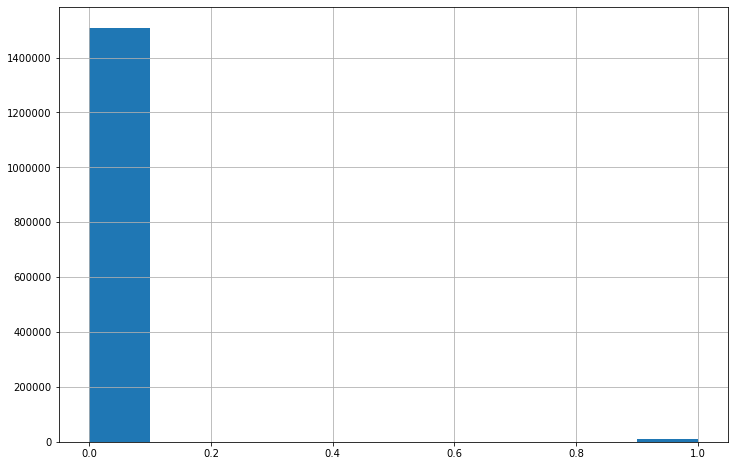

In [7]:
#inspect target
data['went_on_backorder_Yes'].hist(figsize=(12,8))

In [77]:
print(data['went_on_backorder_Yes'].value_counts())

0    1260643
1       8794
Name: went_on_backorder_Yes, dtype: int64


In [46]:
#check missing
helpers.check_missing(data)


***************** Total and Percentage of Missing Values Found *****************

                   Total       Percent
lead_time          80851  5.987686e-02
min_bank               1  7.405827e-07
sales_1_month          1  7.405827e-07
national_inv           1  7.405827e-07
in_transit_qty         1  7.405827e-07
forecast_3_month       1  7.405827e-07
forecast_6_month       1  7.405827e-07
local_bo_qty           1  7.405827e-07
perf_12_month_avg      1  7.405827e-07
perf_6_month_avg       1  7.405827e-07
pieces_past_due        1  7.405827e-07
forecast_9_month       1  7.405827e-07
sales_9_month          1  7.405827e-07
sales_6_month          1  7.405827e-07
sales_3_month          1  7.405827e-07


In [8]:
#handle missing data
data.dropna(axis = 0, how = 'any', inplace = True)

In [9]:
#Sanity check missing
helpers.check_missing(data)

No Missing Values found.


In [11]:
print(data.shape)

(1428211, 23)


In [12]:
#filter columns to remove data we do not want
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['went_on_backorder_Yes', 'sku']]

In [13]:
#Split X,y
X = data[columns].values
y = data['went_on_backorder_Yes'].values

In [14]:
print(len(X), len(y))

1428211 1428211


In [15]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, \
                                                    test_size=0.2, random_state=7, stratify=y)

# Model that always predicts the most frequent class

Below we create a model that will always predict the most frequent class using sklearn's DummyClassifier

In [54]:
#Always classify most frequent
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [59]:
#Predict with dummy classifier
pred = dummy_clf.predict(X_test)

In [60]:
#Get the confusion matrix
cf_matrix = confusion_matrix(pred, y_test)
print(cf_matrix)

[[252129   1759]
 [     0      0]]


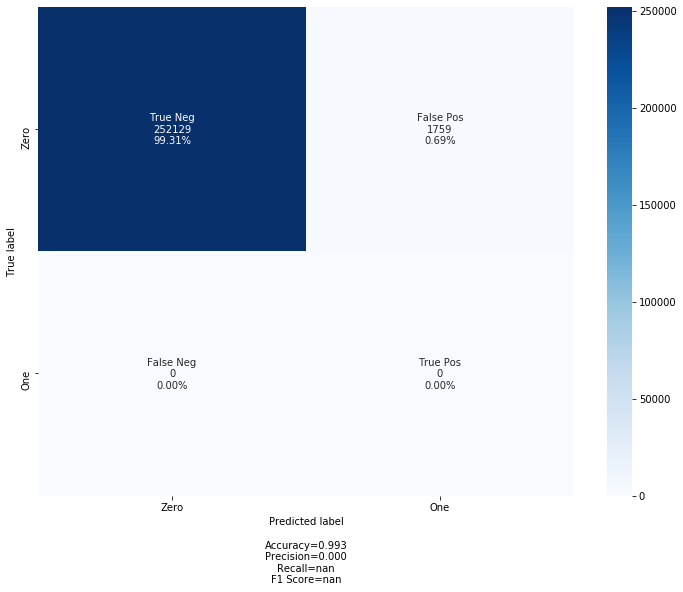

In [63]:
#Pretty confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix.make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories,
                      figsize=(12, 9)
                     )

This model gave a recall and precission of zero with 99% accuracy

# Model that always predicts randomly

Below we create a model that will always makes a random guess using sklearn's DummyClassifier

In [64]:
#Predicts randomly
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='uniform')

In [65]:
#Predict with dummy classifier
pred = dummy_clf.predict(X_test)

In [66]:
#Get the confusion matrix
cf_matrix = confusion_matrix(pred, y_test)
print(cf_matrix)

[[126182    859]
 [125947    900]]


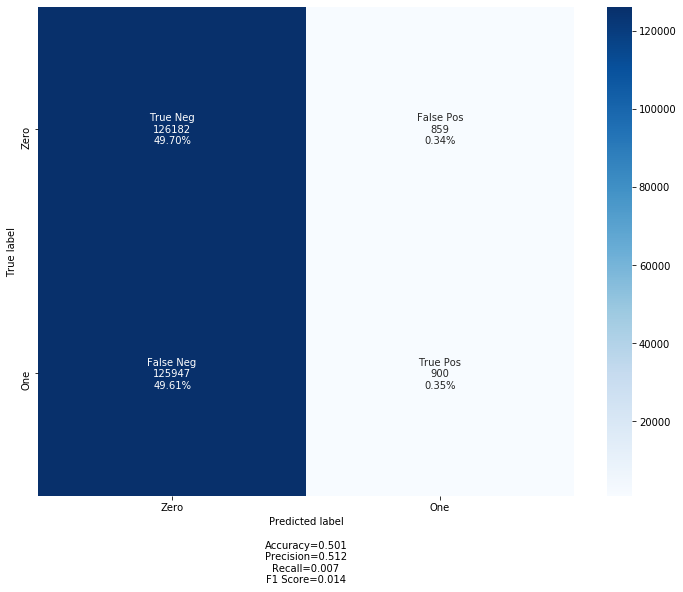

In [67]:
#visualize confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix.make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories,
                      figsize=(12, 9)
                     )

A <b/>random guessing model gave 0.7% recall and 50% accuracy</b>

So our goal is to improve from this.